In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
################################# Required packages ############################
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To draw graphs
import matplotlib.pyplot as plt

# To visualize data
import seaborn as sns

# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  

# To partition the data
from sklearn.model_selection import train_test_split

# Importing performance metrics - accuracy score & confusion matrix
from sklearn import metrics

# To generate ROC curve
from sklearn.metrics import roc_curve

# To calculate AUC score
from sklearn.metrics import roc_auc_score

# importing library of binary classifier
import statsmodels.api as sm

# To calculate confusion matrix
from sklearn.metrics import confusion_matrix

# Complete sklearn
import sklearn

# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# LinearDiscriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Support vector machine classifier
from sklearn import svm

# To perform mathematical operations
import math

# To findout correlation
from scipy.stats import kendalltau

# binary classifier
import statsmodels.api as sm

# Support vector machine classifier
from sklearn import svm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# modified equal bin width creation
def makeequiwidthbins(x_arr, y_arr, threshold, no_of_bins):
    #print('No of bins:', no_of_bins)

    if (no_of_bins == 0):
      return [x_arr, y_arr]

    width = round((max(x_arr) - min(x_arr)) / no_of_bins)
    #print('Width:', width)
    min1 = min(x_arr)
    bin_arr = []
    for i in range(0, no_of_bins+2): #to include the max(x_arr) value
        bin_arr = bin_arr + [min1 + width * i]
    #print('Bin limits array', bin_arr)

    arri = []
    y_proportion = []
    
    for i in range(0, no_of_bins+1):
        temp1 = []
        total_val_in_bin = 0
        total_val_gt_threshold = 0
        index = 0
        for x_val in x_arr:
            if x_val >= bin_arr[i] and x_val < bin_arr[i+1]:
              total_val_in_bin += 1
              if y_arr[index] > threshold:
                #print(index, x_val, y_arr[index], y_arr[index] > threshold)
                temp1 += [y_arr[index]]
                total_val_gt_threshold += 1    
            index += 1

        arri += [temp1]
        #print('No of observations in the bin greater than threshold: ', i, bin_arr[i], bin_arr[i+1], total_val_gt_threshold)
        #print('No of observations in the bin: ', i, total_val_in_bin)
        if (total_val_in_bin != 0): # to avoid 0/0 error
          y_proportion += [round(total_val_gt_threshold/total_val_in_bin, 2)]
        else:
          y_proportion += [0]

    #print('Proportion array:', y_proportion)
    #print('Elements in each bin\n', arri)
    return [np.delete(bin_arr, no_of_bins+1), y_proportion]
    


In [4]:
def scatterplot(n, x_arr, y_arr, x_label, title_label, save_file):
  # plotting the points
  plt.scatter(x_arr, y_arr, color='b')
  
  maxx = max(x_arr)
  maxy = max(y_arr)

  # setting y axis range
  plt.ylim(0, maxy)

  # resetting y axis range
  plt.ylim(0, maxy)
  
  # naming the x axis
  plt.xlabel(x_label)

  # naming the y axis
  plt.ylabel('Proportion As > 10μg/L')
  
  # giving a title to my graph
  plt.title(title_label)
  
  #plt.text(info_pos[0][0], info_pos[0][1], info_label[0], ha='right', va='top',
  
  # function to show the plot
  plt.show()

  # Saving the figure.
  plt.savefig(save_file)

In [5]:
# path
dataset_path = "/content/drive/MyDrive/arsenic_analysis/"

# Reading data
as_df = pd.read_csv(dataset_path + "arsenic_data_gd.csv")

#**** To check variables' data type
#print(df.info())

#**** Check for missing values.            
as_df.isnull()          

#**** How many rows contain missing values? 
#print('Data columns with null values:\n', df.isnull().sum())

as_df_copy1 = as_df.copy()

# Storing the column names 
columns_list=list(as_df_copy1.columns)
print(columns_list)

#drop unwanted columns
as_df_copy2 = as_df_copy1.drop(columns =['S__No_n', 'State', 'District', 'location', 'Lat', 'log', 'Tp_Slt', 'Source'], axis = 1)

#create a categorical variable for Arsenic. If As < 10, then 1 else 0
as_df_copy2['As_ug_cat'] = np.where(as_df_copy2['As_ug'] > 10, 1, 0)

print(as_df_copy2.head(15))
print('Shape of new dataframe (as_df_copy2): ', as_df_copy2.shape, type(as_df_copy2))


['S__No_n', 'State', 'District', 'location', 'Lat', 'log', 'As_ug', 'Source', 'Slope', 'Fluvisols', 'Tp_Clay', 'Sb_Clay', 'Tp_Slt', 'Sb_Slt', 'Tp_pH', 'Sb_pH', 'Tp_car', 'Sb_Car', 'Tp_sand', 'Sb_sand', 'ETP', 'Elevation', 'mos_lulc_1', 'buffer_rv', 'river_lgp', 'Grav_', 'twi', 'mosaic_srt', 'india_geol', 'MONSOON', 'POMRB', 'POMKH', 'PREMON', 'Average']
    As_ug     Slope  Fluvisols  Tp_Clay  ...  POMKH  PREMON  Average  As_ug_cat
0     500  1.277690          4        0  ...   5.00   -1.00     2.00          1
1     350  1.050310          4        0  ...   0.04    0.01     0.47          1
2     325  0.638925          5        0  ...   0.04    0.01     0.47          1
3     425  1.197500          4        0  ...   0.04    0.01     0.49          1
4     300  0.704614          3        0  ...   0.04    0.01     0.47          1
5     250  1.514600          5        0  ...   0.04    0.01     0.48          1
6     200  0.535600          2        0  ...   0.04    0.01     0.49          1
7   

In [6]:
n = len(as_df_copy2)
print('Dataset size: ', n)

sturges_m = 1 + 3.322 * math.log(n)
rice_m = (n ** (1. / 3)) * 2

print('Sturges bin size: ', math.floor(sturges_m))
print('Rice bin size: ', rice_m)

no_of_bins = math.floor(rice_m)
print('No of bins: ', no_of_bins)

Dataset size:  11498
Sturges bin size:  32
Rice bin size:  45.14095718421094
No of bins:  45


In [7]:
threshold = 10

as_df_copy3 = as_df_copy2.copy()
#df_copy3['india_geol'] = df_copy3['india_geol'].astype('category',copy=False)

# Perform dummy encoding on the categorical columns of data
#df_copy4 = pd.get_dummies(df_copy3)
as_df_copy4 = as_df_copy3.copy()

#**** To recheck variables' data type
print(as_df_copy4.info())

print('Columns: ', as_df_copy4.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11498 entries, 0 to 11497
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   As_ug       11498 non-null  int64  
 1   Slope       11498 non-null  float64
 2   Fluvisols   11498 non-null  int64  
 3   Tp_Clay     11498 non-null  int64  
 4   Sb_Clay     11498 non-null  int64  
 5   Sb_Slt      11498 non-null  int64  
 6   Tp_pH       11498 non-null  float64
 7   Sb_pH       11498 non-null  int64  
 8   Tp_car      11498 non-null  int64  
 9   Sb_Car      11498 non-null  int64  
 10  Tp_sand     11498 non-null  int64  
 11  Sb_sand     11498 non-null  int64  
 12  ETP         11498 non-null  int64  
 13  Elevation   11498 non-null  int64  
 14  mos_lulc_1  11498 non-null  int64  
 15  buffer_rv   11498 non-null  int64  
 16  river_lgp   11498 non-null  int64  
 17  Grav_       11498 non-null  float64
 18  twi         11498 non-null  float64
 19  mosaic_srt  11498 non-nul

**Graphs**

As_ug_cat rows with null values:  0
Fluvisol rows with null values:  0
Sb_Clay rows with null values:  0
Sb_Car rows with null values:  0
Slope rows with null values:  0
Groundwater level water rows with null values:  0
India geology rows with null values:  0
Distance from river rows with null values:  0
n: 11498 | points: 46 | Kendall rank correlation : 0.318 | pvalue: 0.0


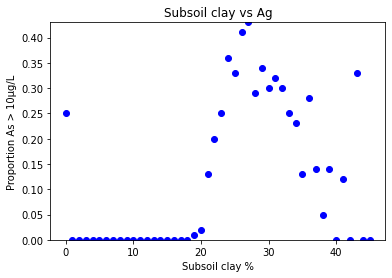

Unique classes: [0 1]
n: 11498 | points: 46 | Kendall rank correlation : -0.522 | pvalue: 0.0


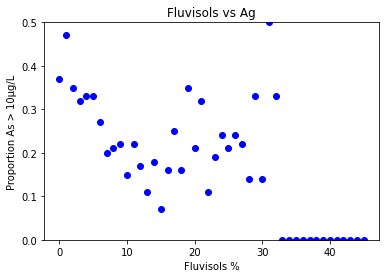

n: 11498 | points: 46 | Kendall rank correlation : -0.517 | pvalue: 0.0


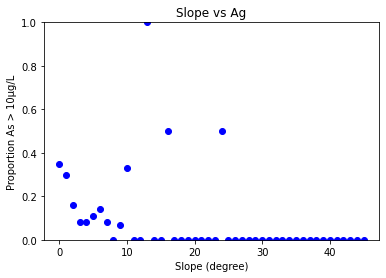

n: 11498 | points: 46 | Kendall rank correlation : -0.579 | pvalue: 0.0


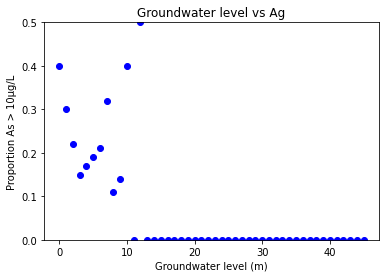

n: 11498 | points: 46 | Kendall rank correlation : -0.357 | pvalue: 0.0


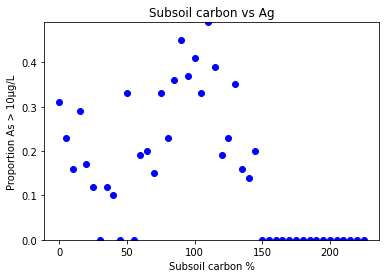

<Figure size 432x288 with 0 Axes>

In [8]:
# Storing the output values in y

#arsenic
arsenic = as_df_copy3['As_ug_cat'].values
print('As_ug_cat rows with null values: ', as_df_copy3['As_ug'].isnull().sum())

#fluvisols
fluvisols = as_df_copy3['Fluvisols'].values
print('Fluvisol rows with null values: ', as_df_copy3['Fluvisols'].isnull().sum())

#sb_clay
sb_clay = as_df_copy3['Sb_Clay'].values
print('Sb_Clay rows with null values: ', as_df_copy3['Sb_Clay'].isnull().sum())

#sb_car
sb_car = as_df_copy3['Sb_Car'].values
print('Sb_Car rows with null values: ', as_df_copy3['Sb_Car'].isnull().sum())

#slope
slope = as_df_copy3['Slope'].values
print('Slope rows with null values: ', as_df_copy3['Slope'].isnull().sum())

#gw_level
gw_level = as_df_copy3['Average'].values
print('Groundwater level water rows with null values: ', as_df_copy3['Average'].isnull().sum())

#geology
geology = as_df_copy3['india_geol'].values
print('India geology rows with null values: ', as_df_copy3['india_geol'].isnull().sum())

#distance of the river
river_dist = as_df_copy3['buffer_rv'].values
print('Distance from river rows with null values: ', as_df_copy3['buffer_rv'].isnull().sum())

threshold = 0

#create bins of equal width
x_arr, y_arr = makeequiwidthbins(sb_clay, arsenic, threshold, no_of_bins)
kendcorr, kendp = kendalltau(x_arr, y_arr)
print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
scatterplot(n, x_arr, y_arr, 'Subsoil clay %', 'Subsoil clay vs Ag', dataset_path + "sb_clay.jpg")

x = np.array(arsenic)
print('Unique classes:', np.unique(x))

x_arr, y_arr = makeequiwidthbins(fluvisols, arsenic, threshold, no_of_bins)
kendcorr, kendp = kendalltau(x_arr, y_arr)
print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
scatterplot(n, x_arr, y_arr, 'Fluvisols %', 'Fluvisols vs Ag', dataset_path + "fluvisols.jpg")

x_arr, y_arr = makeequiwidthbins(slope, arsenic, threshold, no_of_bins)
kendcorr, kendp = kendalltau(x_arr, y_arr)
print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
scatterplot(n, x_arr, y_arr, 'Slope (degree)', 'Slope vs Ag', dataset_path + "slope.jpg")

x_arr, y_arr = makeequiwidthbins(gw_level, arsenic, threshold, no_of_bins)
kendcorr, kendp = kendalltau(x_arr, y_arr)
print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
scatterplot(n, x_arr, y_arr, 'Groundwater level (m)', 'Groundwater level vs Ag', dataset_path + "gw_level.jpg")

#x_arr, y_arr = makeequiwidthbins(river_dist, arsenic, threshold, no_of_bins)
#kendcorr, kendp = kendalltau(x_arr, y_arr)
#print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
#scatterplot(n, x_arr, y_arr, 'Distance from river (km) %', 'Distance from river vs Ag', dataset_path + "river_dist.jpg")

x_arr, y_arr = makeequiwidthbins(sb_car, arsenic, threshold, no_of_bins)
kendcorr, kendp = kendalltau(x_arr, y_arr)
print('n:', n, '| points:', len(y_arr), '| Kendall rank correlation :', round(kendcorr, 3), '| pvalue:', round(kendp, 2))
scatterplot(n, x_arr, y_arr, 'Subsoil carbon %', 'Subsoil carbon vs Ag', dataset_path + "sb_car.jpg")


**Split into training and test datasets**

In [9]:
# Storing the column names 
columns_list = list(as_df_copy3.columns)
print('List of columns:', columns_list)

features=list(['Fluvisols', 'Sb_Clay', 'Sb_Car', 'Slope', 'Average', 'india_geol', 'buffer_rv'])
print('Features: ', features)

# Storing the output values in y
y = as_df_copy3['As_ug_cat'].values
#print(y)

# Storing the values from input features
x = as_df_copy3[features].values
#print(x)

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#print(x_test[6,0], x_test[6,1], x_test[6,2], x_test[6,4])

List of columns: ['As_ug', 'Slope', 'Fluvisols', 'Tp_Clay', 'Sb_Clay', 'Sb_Slt', 'Tp_pH', 'Sb_pH', 'Tp_car', 'Sb_Car', 'Tp_sand', 'Sb_sand', 'ETP', 'Elevation', 'mos_lulc_1', 'buffer_rv', 'river_lgp', 'Grav_', 'twi', 'mosaic_srt', 'india_geol', 'MONSOON', 'POMRB', 'POMKH', 'PREMON', 'Average', 'As_ug_cat']
Features:  ['Fluvisols', 'Sb_Clay', 'Sb_Car', 'Slope', 'Average', 'india_geol', 'buffer_rv']


**Build a SupportVectorMachine**

References:

1. https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [10]:
# =============================================================================
# SupportVectorMachine
# =============================================================================

#check the version of sklearn
print(sklearn.__version__)

# define the model
SVM_Classifier = svm.SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)

print('y_train shape:', y_train.shape)
print('x_train shape:', x_train.shape)

# Fitting the values for X and Y
SVM_Classifier.fit(x_train, y_train)

# Predicting the test values with model
y_predicted = SVM_Classifier.predict(x_test)
print('Classes predicted: ', np.unique(y_predicted))
print('Total predictions: ', len(y_predicted))
print('Actual count of As=0 [0,2]: ', np.count_nonzero(y_test == 0), '| As=1 [1,2]: ', np.count_nonzero(y_test == 1))
print('Predicted count of As=0 [2,0]: ', np.count_nonzero(y_predicted == 0), '| As=0 [2,1]: ', np.count_nonzero(y_predicted == 1))

# Confusion matrix
# Ci,j is equal to the number of observations known to be in group  and predicted to be in group j.
###############################################
#               Pred+(0)     Pred-(1)
# Actual+(0)    TN           FP       TActual+(0)
# Actual-(1)    FN*          TP       TActual-(1)
#               TPred+       TPred-
#
# FN = falsely predicted negative
# FP = falsely predicted positive
# 0 is negative, 1 is positive
###############################################

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Calculating the accuracy
acc_score = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy: ", round(acc_score, 3))
print("Precision: ", round(metrics.precision_score(y_test, y_predicted), 3))
print("Sensitivity or recall using function:", round(metrics.recall_score(y_test, y_predicted), 3))

# sensitivity = TP/(TP + FN)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity or recall using confusion matrix: ', round(sensitivity, 3))

# specificity = TN/(TN + FP)
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity using confusion matrix: ', round(specificity, 3))

# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_test != y_predicted).sum())

0.22.2.post1
y_train shape: (8048,)
x_train shape: (8048, 7)
Classes predicted:  [0 1]
Total predictions:  3450
Actual count of As=0 [0,2]:  2326 | As=1 [1,2]:  1124
Predicted count of As=0 [2,0]:  2642 | As=0 [2,1]:  808
[[2064  262]
 [ 578  546]]
Accuracy:  0.757
Precision:  0.676
Sensitivity or recall using function: 0.486
Sensitivity or recall using confusion matrix:  0.486
Specificity using confusion matrix:  0.887
Misclassified samples: 840


AUC score for SVM classifier:  0.772


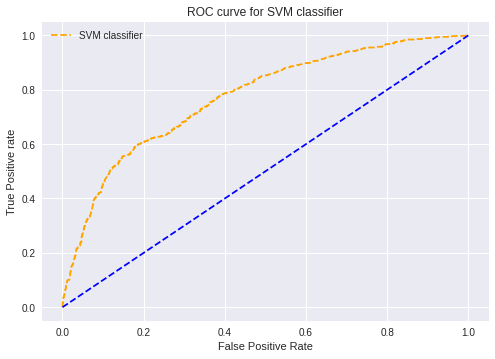

Verification check: At 0.5 cutoff, predicted Class0 (No Arsenic): 2654 Class1 (Arsenic):796
[0 0 1 ... 0 0 1]


In [11]:
# =============================================================================
# ROC curve
# =============================================================================

# predict probabilities of each X_test
y_pred_prob = SVM_Classifier.predict_proba(x_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
print('AUC score for SVM classifier: ', round(auc_score, 3))

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for SVM classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig(dataset_path + 'ROC_SVM_classifier', dpi=300)
plt.show();

# =============================================================================
# Specificity, sensitivity, and accuracy curve
# =============================================================================

numbers = [float(x)/100 for x in range(100)]
#print(numbers)
y_predicted_at_cutoffs = []

#x = np.array(y_pred_prob)
#print('Unique probabilities:', np.unique(x))

for irow in range(len(y_pred_prob)):
  v = [x_test[irow,4], y_test[irow], round(y_pred_prob[irow,0] , 3), y_predicted[irow]]
  for cutof_prob in numbers:
    if (y_pred_prob[irow, 0] > cutof_prob): # non-arsenic
      v.append(0)
    else:
      v.append(1)
  y_predicted_at_cutoffs.append(v)

#print("y_predicted_at_cutoffs:", y_predicted_at_cutoffs)

# How many 0 and 1 using cuttof of 0.5?
class0, class1 = 0, 0
for irow in range(len(y_pred_prob)):
  if (y_pred_prob[irow,0] > 0.5):
    class0 += 1
  else:
    class1 += 1
print("Verification check: At 0.5 cutoff, predicted Class0 (No Arsenic): " + str(class0) + " Class1 (Arsenic):" + str(class1))

#print(pred_prob_y)
print(y_predicted)


Verification step: i, Specificity/Senstivity/Accuracy: 0.5 0.89 0.48 0.757
Intersection point: i, Specificity/Senstivity/Accuracy: 0.77 0.693 0.69 0.692


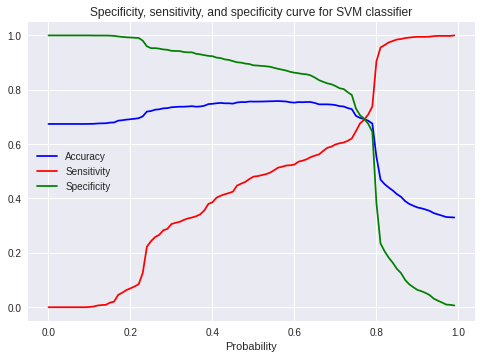

      Probability  Accuracy  Sensitivity  Specificity
0.60         0.60  0.752754     0.524911     0.862855
0.61         0.61  0.754783     0.535587     0.860705
0.62         0.62  0.754203     0.539146     0.858126
0.63         0.63  0.755072     0.544484     0.856836
0.64         0.64  0.754783     0.552491     0.852537
0.65         0.65  0.751304     0.557829     0.844798
0.66         0.66  0.746377     0.562278     0.835340
0.67         0.67  0.746377     0.574733     0.829321
0.68         0.68  0.746377     0.586299     0.823732
0.69         0.69  0.745507     0.590747     0.820292
0.70         0.70  0.743768     0.598754     0.813844
0.71         0.71  0.739710     0.603203     0.805675
0.72         0.72  0.738551     0.605872     0.802666
0.73         0.73  0.732754     0.612100     0.791058
0.74         0.74  0.728696     0.620996     0.780739
0.75         0.75  0.704058     0.647687     0.731298
0.76         0.76  0.696522     0.676157     0.706363
0.77         0.77  0.692174 

In [12]:
y_predicted_at_cutoffs_df = pd.DataFrame(y_predicted_at_cutoffs, columns = ['Average','y_test','y_pred_prob','y_predicted'] + numbers)
#print(y_predicted_at_cutoffs_df.head(150))

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

for icols in numbers:
    cm1 = metrics.confusion_matrix(y_predicted_at_cutoffs_df['y_test'], y_predicted_at_cutoffs_df[icols])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[icols] =[icols, accuracy, sensitivity, specificity]
    
    # calculate the cutoff, and the accuracy, senstivity,and specificity at the cutoff.    
    if (icols == 0.77):
      print('Intersection point: i, Specificity/Senstivity/Accuracy:', icols, round(specificity, 3), round(sensitivity, 3), round(accuracy, 3))
    if (icols == 0.5):
      print('Verification step: i, Specificity/Senstivity/Accuracy:', icols, round(specificity, 3), round(sensitivity, 3), round(accuracy, 3))

# gca stands for 'get current axis'
plt.title('Specificity, sensitivity, and specificity curve for SVM classifier')

ax = plt.gca()

cutoff_df.plot(kind='line',x='Probability',y='Accuracy', color='blue', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Sensitivity', color='red', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Specificity', color='green', ax=ax)

plt.savefig(dataset_path + 'SAS_SVM_classifier', dpi=300)
plt.show()

print(cutoff_df.iloc[60:80,:])

# write to a csv for use in ensemble
print('Writing probabilities to file: ', dataset_path + 'SVM_summary.csv')
y_predicted_at_cutoffs_df.rename(columns = {'Average':'Average_svm', 'y_test':'y_test_svm', 'y_pred_prob':'y_pred_prob_svm', 'y_predicted':'y_predicted_svm'}, inplace = True)
y_predicted_at_cutoffs_df.to_csv(dataset_path + 'SVM_summary.csv', index=False, columns=['Average_svm','y_test_svm','y_pred_prob_svm','y_predicted_svm'])